In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Add winner, loser and weight


In [ ]:
def team_updater(x):
    if x['score_home'] > x['score_away'] :    
        x['winner'] = x['team_home']
        x['loser'] = x['team_away']
    else:
        x['winner'] = x['team_away']
        x['loser'] = x['team_home']

    return x

In [ ]:
Original_nfl = pd.read_csv('nfl2020.csv')
nfl = Original_nfl.iloc[:,4:8]
nfl['weight'] = abs(nfl['score_home'] - nfl['score_away'])
nfl = nfl.apply(team_updater,axis=1)
nfl

,team_home,score_home,score_away,team_away,weight,winner,loser
0,Kansas City Chiefs,34,20,Houston Texans,14,Kansas City Chiefs,Houston Texans
1,Atlanta Falcons,25,38,Seattle Seahawks,13,Seattle Seahawks,Atlanta Falcons
2,Baltimore Ravens,38,6,Cleveland Browns,32,Baltimore Ravens,Cleveland Browns
3,Buffalo Bills,27,17,New York Jets,10,Buffalo Bills,New York Jets
4,Carolina Panthers,30,34,Las Vegas Raiders,4,Las Vegas Raiders,Carolina Panthers
...,...,...,...,...,...,...,...
264,Kansas City Chiefs,22,17,Cleveland Browns,5,Kansas City Chiefs,Cleveland Browns
265,New Orleans Saints,20,30,Tampa Bay Buccaneers,10,Tampa Bay Buccaneers,New Orleans Saints
266,Green Bay Packers,26,31,Tampa Bay Buccaneers,5,Tampa Bay Buccaneers,Green Bay Packers
267,Kansas City Chiefs,38,24,Buffalo Bills,14,Kansas City Chiefs,Buffalo Bills


## Creating the graph

In [ ]:
Nfl_graph = nx.from_pandas_edgelist(nfl,source='loser',target='winner', edge_attr=['weight'], create_using=nx.DiGraph())

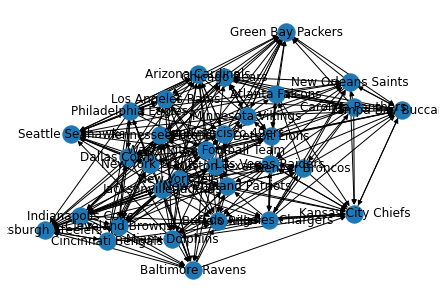

In [ ]:
nx.draw_spring(Nfl_graph,with_labels=True)

#Testing Centralities


## Degree

In [ ]:
deg = nx.degree_centrality(Nfl_graph)
deg

{'Houston Texans': 0.4193548387096774,
 'Kansas City Chiefs': 0.5483870967741935,
 'Atlanta Falcons': 0.45161290322580644,
 'Seattle Seahawks': 0.4838709677419355,
 'Cleveland Browns': 0.4838709677419355,
 'Baltimore Ravens': 0.4838709677419355,
 'New York Jets': 0.4193548387096774,
 'Buffalo Bills': 0.4838709677419355,
 'Carolina Panthers': 0.45161290322580644,
 'Las Vegas Raiders': 0.4838709677419355,
 'Cincinnati Bengals': 0.45161290322580644,
 'Los Angeles Chargers': 0.5161290322580645,
 'Detroit Lions': 0.45161290322580644,
 'Chicago Bears': 0.4838709677419355,
 'Indianapolis Colts': 0.5161290322580645,
 'Jacksonville Jaguars': 0.45161290322580644,
 'Dallas Cowboys': 0.4838709677419355,
 'Los Angeles Rams': 0.4838709677419355,
 'Minnesota Vikings': 0.4838709677419355,
 'Green Bay Packers': 0.4838709677419355,
 'Miami Dolphins': 0.45161290322580644,
 'New England Patriots': 0.45161290322580644,
 'Tampa Bay Buccaneers': 0.5161290322580645,
 'New Orleans Saints': 0.45161290322580644,

In [ ]:
nx.in_degree_centrality(Nfl_graph)

{'Houston Texans': 0.0967741935483871,
 'Kansas City Chiefs': 0.45161290322580644,
 'Atlanta Falcons': 0.12903225806451613,
 'Seattle Seahawks': 0.3548387096774194,
 'Cleveland Browns': 0.3225806451612903,
 'Baltimore Ravens': 0.3225806451612903,
 'New York Jets': 0.06451612903225806,
 'Buffalo Bills': 0.3870967741935484,
 'Carolina Panthers': 0.16129032258064516,
 'Las Vegas Raiders': 0.22580645161290322,
 'Cincinnati Bengals': 0.16129032258064516,
 'Los Angeles Chargers': 0.22580645161290322,
 'Detroit Lions': 0.16129032258064516,
 'Chicago Bears': 0.25806451612903225,
 'Indianapolis Colts': 0.3225806451612903,
 'Jacksonville Jaguars': 0.03225806451612903,
 'Dallas Cowboys': 0.1935483870967742,
 'Los Angeles Rams': 0.29032258064516125,
 'Minnesota Vikings': 0.1935483870967742,
 'Green Bay Packers': 0.3870967741935484,
 'Miami Dolphins': 0.29032258064516125,
 'New England Patriots': 0.1935483870967742,
 'Tampa Bay Buccaneers': 0.3870967741935484,
 'New Orleans Saints': 0.2903225806451

In [ ]:
 nx.out_degree_centrality(Nfl_graph) 

{'Houston Texans': 0.3225806451612903,
 'Kansas City Chiefs': 0.0967741935483871,
 'Atlanta Falcons': 0.3225806451612903,
 'Seattle Seahawks': 0.12903225806451613,
 'Cleveland Browns': 0.16129032258064516,
 'Baltimore Ravens': 0.16129032258064516,
 'New York Jets': 0.3548387096774194,
 'Buffalo Bills': 0.0967741935483871,
 'Carolina Panthers': 0.29032258064516125,
 'Las Vegas Raiders': 0.25806451612903225,
 'Cincinnati Bengals': 0.29032258064516125,
 'Los Angeles Chargers': 0.29032258064516125,
 'Detroit Lions': 0.29032258064516125,
 'Chicago Bears': 0.22580645161290322,
 'Indianapolis Colts': 0.1935483870967742,
 'Jacksonville Jaguars': 0.4193548387096774,
 'Dallas Cowboys': 0.29032258064516125,
 'Los Angeles Rams': 0.1935483870967742,
 'Minnesota Vikings': 0.29032258064516125,
 'Green Bay Packers': 0.0967741935483871,
 'Miami Dolphins': 0.16129032258064516,
 'New England Patriots': 0.25806451612903225,
 'Tampa Bay Buccaneers': 0.12903225806451613,
 'New Orleans Saints': 0.16129032258

#### degree_centrality is useless since every team is going to have a similar degree since they played against each other. If we add in_degree_centrality those who won more times will have a higher degree and in out_degree_centrality those who have lost more will have a higher degree.

## Betweenness

In [ ]:
bet = nx.betweenness_centrality(Nfl_graph)
bet

{'Houston Texans': 0.019350998463901693,
 'Kansas City Chiefs': 0.027694999146612047,
 'Atlanta Falcons': 0.0313543654672687,
 'Seattle Seahawks': 0.026733526330300527,
 'Cleveland Browns': 0.03570200110522691,
 'Baltimore Ravens': 0.027651914990624662,
 'New York Jets': 0.027042246880956557,
 'Buffalo Bills': 0.030315425315425314,
 'Carolina Panthers': 0.031468122677800095,
 'Las Vegas Raiders': 0.050855211097146594,
 'Cincinnati Bengals': 0.03858540205314399,
 'Los Angeles Chargers': 0.03715808683550619,
 'Detroit Lions': 0.03436851678787162,
 'Chicago Bears': 0.03657245681439231,
 'Indianapolis Colts': 0.07194880090041382,
 'Jacksonville Jaguars': 0.01865932753029527,
 'Dallas Cowboys': 0.02662607702930284,
 'Los Angeles Rams': 0.05260334945818817,
 'Minnesota Vikings': 0.03546544256221676,
 'Green Bay Packers': 0.024370262354133317,
 'Miami Dolphins': 0.01810876101198682,
 'New England Patriots': 0.05063748079877114,
 'Tampa Bay Buccaneers': 0.036336208594273105,
 'New Orleans Sain

#### Betweenness does not work for this problem since in this centrality the important nodes are the ones that connect other nodes. In this case the majority is connected with all.

## Closeness

In [ ]:
cer = nx.closeness_centrality(Nfl_graph)
cer

{'Houston Texans': 0.4025974025974026,
 'Kansas City Chiefs': 0.6458333333333334,
 'Atlanta Falcons': 0.43661971830985913,
 'Seattle Seahawks': 0.5740740740740741,
 'Cleveland Browns': 0.5254237288135594,
 'Baltimore Ravens': 0.5254237288135594,
 'New York Jets': 0.4189189189189189,
 'Buffalo Bills': 0.62,
 'Carolina Panthers': 0.45588235294117646,
 'Las Vegas Raiders': 0.543859649122807,
 'Cincinnati Bengals': 0.43661971830985913,
 'Los Angeles Chargers': 0.484375,
 'Detroit Lions': 0.4626865671641791,
 'Chicago Bears': 0.49206349206349204,
 'Indianapolis Colts': 0.5636363636363636,
 'Jacksonville Jaguars': 0.36470588235294116,
 'Dallas Cowboys': 0.484375,
 'Los Angeles Rams': 0.5535714285714286,
 'Minnesota Vikings': 0.4492753623188406,
 'Green Bay Packers': 0.5636363636363636,
 'Miami Dolphins': 0.5535714285714286,
 'New England Patriots': 0.5,
 'Tampa Bay Buccaneers': 0.6078431372549019,
 'New Orleans Saints': 0.5,
 'San Francisco 49ers': 0.44285714285714284,
 'Arizona Cardinals': 

#### Closeness is useless since everyone is close to everyone.

## PageRank

In [ ]:
page = nx.pagerank(Nfl_graph, alpha = 0.9)
page

{'Houston Texans': 0.005452875671233376,
 'Kansas City Chiefs': 0.05909247421782035,
 'Atlanta Falcons': 0.024274698947661096,
 'Seattle Seahawks': 0.025725714469160946,
 'Cleveland Browns': 0.028470175397636428,
 'Baltimore Ravens': 0.033075850060401125,
 'New York Jets': 0.008312142976498555,
 'Buffalo Bills': 0.060247429246609606,
 'Carolina Panthers': 0.011905350196689864,
 'Las Vegas Raiders': 0.04614735478917379,
 'Cincinnati Bengals': 0.019883721009860657,
 'Los Angeles Chargers': 0.025802711392659546,
 'Detroit Lions': 0.006292133815363229,
 'Chicago Bears': 0.01239729599523838,
 'Indianapolis Colts': 0.045952920048848336,
 'Jacksonville Jaguars': 0.008294684688573615,
 'Dallas Cowboys': 0.011966062318395818,
 'Los Angeles Rams': 0.03490971885562859,
 'Minnesota Vikings': 0.0313135589748193,
 'Green Bay Packers': 0.06878891679546505,
 'Miami Dolphins': 0.02403002949937881,
 'New England Patriots': 0.030265765793004225,
 'Tampa Bay Buccaneers': 0.10563191316193703,
 'New Orleans

#### This centrality is useful because the winners will have  a higher score, if they beat a major team they will get more points as in the case of the New Orleans Saints.

# PageRank Rank

In [ ]:
nfl.winner.value_counts()

Kansas City Chiefs          16
Tampa Bay Buccaneers        15
Buffalo Bills               15
Green Bay Packers           14
New Orleans Saints          13
Seattle Seahawks            12
Pittsburgh Steelers         12
Cleveland Browns            12
Baltimore Ravens            12
Tennessee Titans            11
Indianapolis Colts          11
Los Angeles Rams            11
Miami Dolphins              10
Arizona Cardinals            8
Chicago Bears                8
Las Vegas Raiders            8
Los Angeles Chargers         7
New England Patriots         7
Washington Football Team     7
Minnesota Vikings            7
Dallas Cowboys               6
San Francisco 49ers          6
New York Giants              6
Denver Broncos               5
Detroit Lions                5
Cincinnati Bengals           5
Carolina Panthers            5
Philadelphia Eagles          4
Houston Texans               4
Atlanta Falcons              4
New York Jets                2
Jacksonville Jaguars         1
Name: wi

In [ ]:
sortedpage = sorted(page.items(), reverse=True, key = lambda x:x[1])
sortedpage

[('Tampa Bay Buccaneers', 0.10563191316193703),
 ('New Orleans Saints', 0.10088191828191384),
 ('Green Bay Packers', 0.06878891679546505),
 ('Buffalo Bills', 0.060247429246609606),
 ('Kansas City Chiefs', 0.05909247421782035),
 ('Tennessee Titans', 0.05820081285424619),
 ('Las Vegas Raiders', 0.04614735478917379),
 ('Indianapolis Colts', 0.045952920048848336),
 ('Los Angeles Rams', 0.03490971885562859),
 ('Pittsburgh Steelers', 0.03341243713775068),
 ('Baltimore Ravens', 0.033075850060401125),
 ('Minnesota Vikings', 0.0313135589748193),
 ('New England Patriots', 0.030265765793004225),
 ('Cleveland Browns', 0.028470175397636428),
 ('Los Angeles Chargers', 0.025802711392659546),
 ('Seattle Seahawks', 0.025725714469160946),
 ('Atlanta Falcons', 0.024274698947661096),
 ('Miami Dolphins', 0.02403002949937881),
 ('Cincinnati Bengals', 0.019883721009860657),
 ('San Francisco 49ers', 0.01701225011442116),
 ('Arizona Cardinals', 0.01688746071769328),
 ('Washington Football Team', 0.013935347451

#### If we look only at wins Kansas City Chiefs is the first, which contrasts with PageRank since New Orleans Saints, Green Bay Packers and Buffalo Bills are ahead of it, this is because these teams beat an important team so they have a higher rank.

In [ ]:
colors = ['#0cdc00',
'#37d800',
'#4cd300',
'#5bcf00',
'#68ca00',
'#73c600',
'#7dc100',
'#86bc00',
'#8eb700',
'#95b300',
'#9cad00',
'#a3a800',
'#a9a300',
'#af9e00',
'#b49800',
'#b99300',
'#be8d00',
'#c28700',
'#c68100',
'#ca7b00',
'#ce7400',
'#d16e00',
'#d46700',
'#d66000',
'#d85900',
'#da5100',
'#dc4900',
'#dd4000',
'#de3700',
'#df2c00',
'#df1e00',
'#df0808']
sortedpage = dict(sortedpage)
sortedpage2 = sortedpage.copy()
for i,name in enumerate(sortedpage2.keys()):
    sortedpage2[name] = colors[i]

colors = []
for i in page.keys():
    colors.append(sortedpage2[i])
    
    

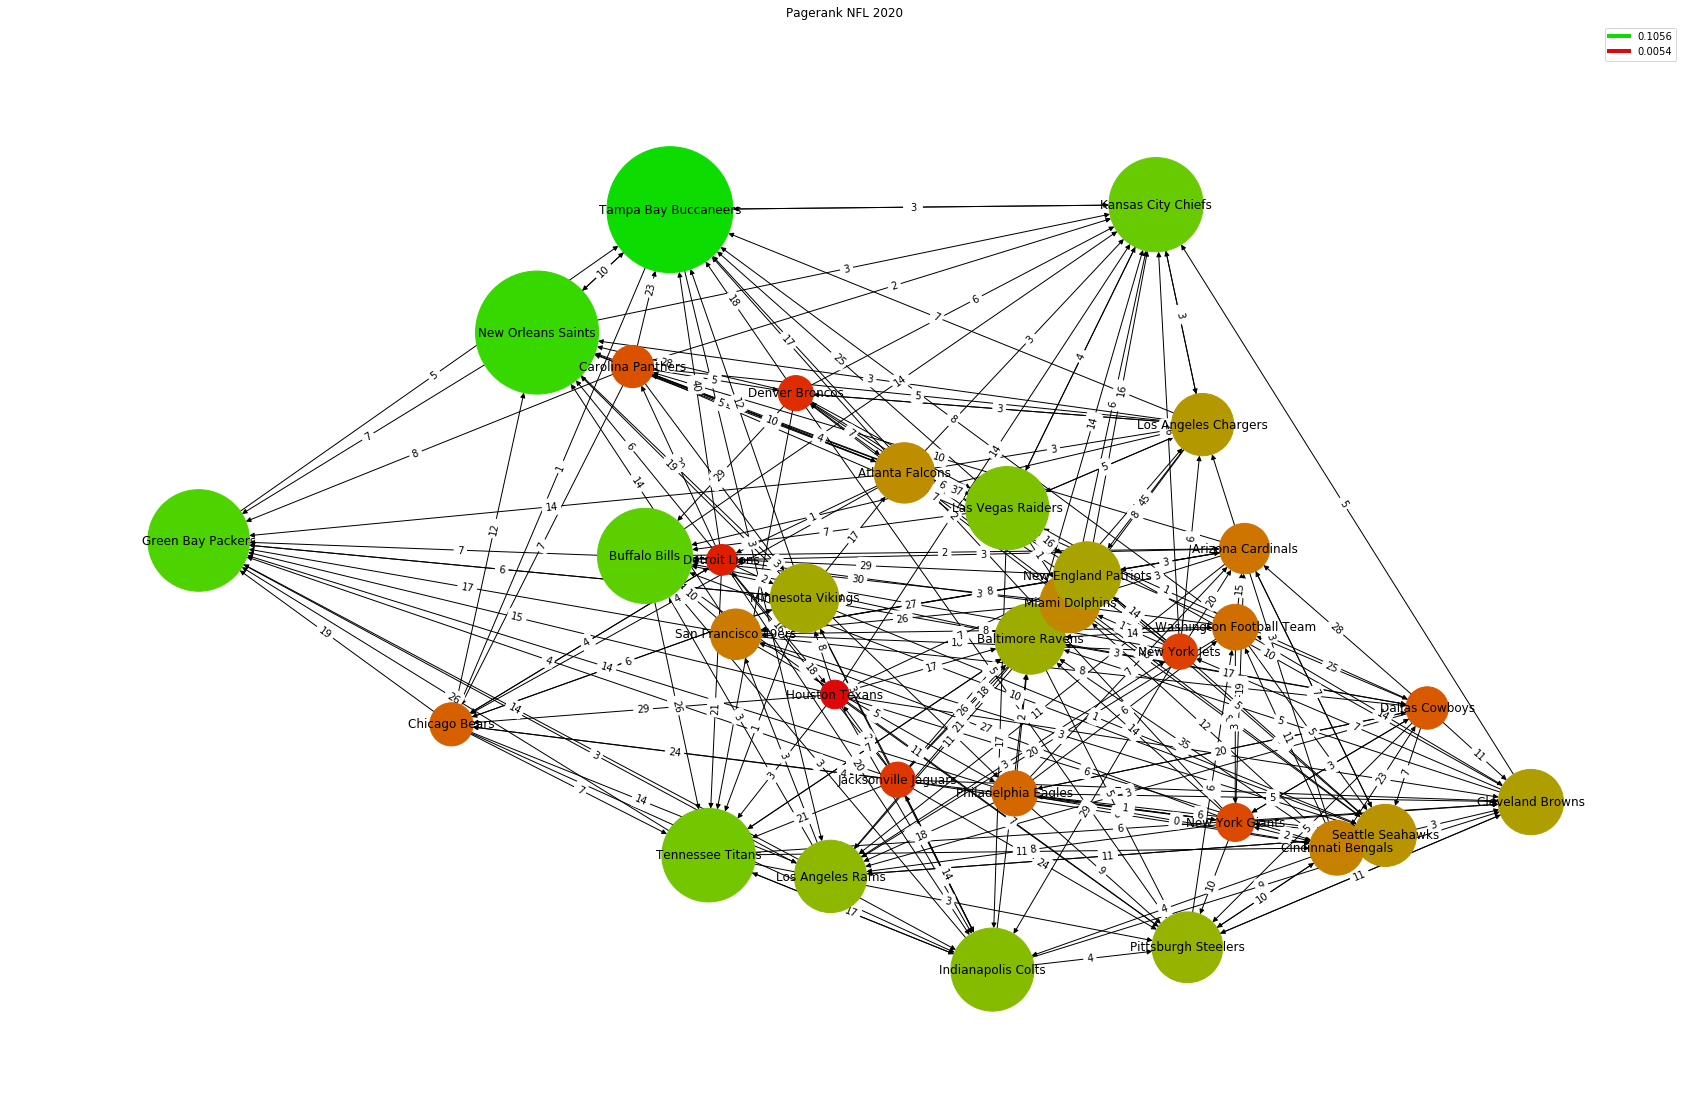

In [ ]:
fig, ax = plt.subplots()
custom_lines = [Line2D([0], [0], color='#0cdc00', lw=4),
                Line2D([0], [0], color= '#df0808', lw=4)]
ax.legend(custom_lines, ['0.1056', '0.0054'])
pos = nx.spring_layout(Nfl_graph)
#nx.draw_networkx_nodes(Nfl_graph, pos, nodelist=page_names,node_shape = page_values , **options)
nx.draw(Nfl_graph,pos, node_size=[v * 150000 for v in page.values()],with_labels=True,node_color=colors)
edge_labels = nx.get_edge_attributes(Nfl_graph,'weight')
nx.draw_networkx_edge_labels(Nfl_graph,pos,edge_labels=edge_labels)

    
plt.title('Pagerank NFL 2020')
plt.plot()





plt.gcf().set_size_inches(30, 20)
plt.show()
